# Homework 2: Convolutions and Spike Trains
## Due: Tuesday, December 17, 11:59pm

## Part 1: Convolutions

### Math Exercises - Convolutions

The first portion of this homework assignment contains mathematics questions related to the topics covered this week (Convolutions and Filters).
Please write your answers using the Jupyter markup cell’s LaTeX interpreter, or embed a scanned image/pdf of your answers into the markup cell.

More information about LaTeX and Jupyter markdown formatting can be found here:

[https://jupyterbook.org/en/stable/content/math.html](https://jupyterbook.org/en/stable/content/math.html)

And Here:

[https://ashki23.github.io/markdown-latex.html](https://ashki23.github.io/markdown-latex.html)

<a id="question-1"></a>
### Convolving Two Arrays

Given two arrays, $A = [3, 4, 5, 6, 2]$ and $B = [1, 2, 3]$, perform the regular convolution of these arrays. Provide a detailed step-by-step calculation and explain how the convolution changes the characteristics of the original arrays. What is the significance of convolution in signal processing, especially in the context of neural data analysis?

$$A \ast B = [3\cdot 1, 3 \cdot 2 + 4 \cdot 1, 3 \cdot 3 + 4 \cdot 2 + 5 \cdot 1, 4 \cdot 3+5 \cdot 2+6\cdot 1,5 \cdot 3+6\cdot 2+2\cdot 1,6\cdot 3+2 \cdot 2, 2 \cdot 3]=[3,10,22, 28, 29, 22,  6]$$

Convolution modifies an input signal through a kernel. 
In signal processing, it smooths, sharpens, or extracts patterns, depending on the features of the kernel. 
For neural data analysis, convolution can be used to enhance signal, isolate rhythms, or enable time-frequency decomposition.

In [1]:
#check the computations

import numpy as np

a = [3,4,5,6,2]
b = [1,2,3]

ab = np.convolve(a,b)
print(ab)

[ 3 10 22 28 29 22  6]


### Convolving Two Signals with an FFT

Consider two discrete-time signals, $X[n]$ and $Y[n]$, each with a length of 1000 points. Write an expression for convolving these signals using the Fast Fourier Transform (FFT) method. Compare the computational complexity of this method with the direct convolution method. Why is FFT-based convolution particularly beneficial in the context of processing large neural datasets?

### FFT convolution

The convolution of two discrete-time signals $X[n]$ and $Y[n]$ using the FFT method can be expressed as:

$$X \ast Y = \text{IFFT} ( \text{FFT}(X[n]) \cdot \text{FFT}(Y[n]) )$$

where: $\text{FFT}(X[n])$ and $\text{FFT}(Y[n])$ are the (Fast) Fourier transforms of $(X[n])$ and $(Y[n])$; $(\text{IFFT})$ is the inverse (Fast) Fourier transform.

### Computational Complexity Comparsion

Direct convolution conplexity is $ O(N^2) $. Given $N=1000$ complexity $O(N^2)=1000000$

FFT complexty is $O(N \log N)$. Thus FFT convolution complexity is $ 2O(N \log N)+N$ since FFT convolution comprises FFT, pairvise multiplication and IFFT. Given $N=1000$ FFT convolution complexity is $ \sim 20931.57$. 

Thus FFT convolution is benefitial for large data processing due to it's significantly smaller computational complexity.

In [33]:
import numpy as np
from scipy import signal
import time

x = np.random.rand(100000)  # Signal x
y = np.random.rand(100000)  # Signal y

N = len(x) + len(y)

t = time.process_time()

xy_fft = signal.fftconvolve(x,y)

elapsed_time = time.process_time() - t
print(f"FFT convolution took {elapsed_time} seconds")

t = time.process_time()

xy = np.convolve(x,y)

elapsed_time = time.process_time() - t
print(f"Direct convolution took {elapsed_time} seconds")

FFT convolution took 0.014173999999999687 seconds
Direct convolution took 7.648137 seconds


### Moving Average Filter

You have a signal $S = [2, 3, 4, 5, 6, 7, 8, 9, 10]$. Calculate the moving average of this signal using a Finite Impulse Response (FIR) filter with a window size of 3. Show your calculations in detail. Discuss the effect of the moving average filter on the signal, particularly in terms of smoothing and latency. How does this apply to neural signal processing?

For moving average with window size 3 FIR moving average filter is defined as:

$$ h[n] = \left\{ \begin{array}{ccc} \frac{1}{3} & \mbox{for} &  n \in [0,1,2] \\ 0 & \mbox{for} & n \notin [0,1,2] \end{array} \right. $$

Thus output of the convolution $y[n]$ is defined as:

$$y[n] = \sum_{k=0}^n h[k] \cdot x[n-k] = \frac{1}3 (x[n]+x[n-1]+x[n-2])$$

where $x[n]$ is $n$-th enthry of signal array.

Thus, for signal $x[n]=[2,3,4,5,6,7,8,9,10]$ moving average is:

$$y[n] = [\frac{1}3(0+0+2),\frac{1}3(0+2+3),\frac{1}3(2+3+4),\frac{1}3(3+4+5),\frac{1}3(4+5+6),\frac{1}3(5+6+7),\frac{1}3(6+7+8),\frac{1}3(7+8+9),\frac{1}3(8+9+10)]$$
$$=[\frac{2}3,\frac{5}3,3,4,5,6,7,8,9]$$

For neural data analysis, convolution can be used in:
- Noise reduction. Moving average filters suppress this noise, improving signal interpretability.
- Exporatory frequacy analysis. Smoothing the neural data reveals trends in slow brain rhythms.
- ERP analysis. Averaging enhances ERP signals by reducing random noise.

In [77]:
import numpy as np

s = [0,0,2,3,4,5,6,7,8,9,10]
h = [1/3, 1/3, 1/3]

y = np.convolve(s,h,mode='valid')
print(y)

[0.66666667 1.66666667 3.         4.         5.         6.
 7.         8.         9.        ]


### Programming Exercises

In the following cells, you will write python code to manipulate and analyze an EEG signal, in order to gain insights about what is contained in the signal.

You are provided with 10 EEG recordings containing an ERP. These 10 recordings are in the file named "eeg_signals.pkl". You are also provided with a file called "erp_timestamps.txt", which contain the timestamps for the ERPs in the 10 signals.

You are also provided with an 11th EEG recording, in which you will try to locate the ERP. No timestamp is provided for this recording. This recording is saved in the file called "eeg_signal_to_analyze.pkl".

### Utilize the Convolution Operator From Standard Libraries
Show using Python's `numpy.convolve`
that convolution is a commutative operator.

In [101]:
import numpy as np

x = np.random.rand(1000)
h = np.random.rand(100)

xh = np.convolve(x, h)
hx = np.convolve(h, x)

y = xh-hx
for item in y:
    if item != 0:
        print(item)

### Write Your Own Convolution Function
Convolve these two signals first with the mentioned functions, and then with your
own code. Write a function that convolves two signals without using any external libraries' built-in convolution function (more general functions such as `np.dot` are permissable).

`x = [1 5 7 9 3 3 3 9 8] ; y = [1 3]`

The convolution should be done in the 'full' mode, meaning that all possible
multiplications of these signals should occur. Remember, The definition of
convolution is: $(x*y)[n] = \sum_{n \in \mathbb{Z}}{x[m] y[m-n]}$. Additionaly,
take note that Matlab flips the second vector that enters the `conv`
function.

In [5]:
import numpy as np

def dope_convolution_420(x, h):
    len_x = len(x)
    len_h = len(h)
    len_y = len_x + len_h - 1  # Length of the output matches 'full' mode
    
    y = [0] * len_y # Output array
    
    for n in range(len_y):
        for k in range(len_h):
            if 0 <= n - k < len_x:
                y[n] += x[n - k] * h[k]
    return y

x = [1, 5, 7, 9, 3, 3, 3, 9, 8]
h = [1, 3]

custom_out = dope_convolution_420(x, h)
np_out = np.convolve(x, h, mode='full')

custom_out, np_out.tolist()

([1, 8, 22, 30, 30, 12, 12, 18, 35, 24],
 [1, 8, 22, 30, 30, 12, 12, 18, 35, 24])

<a id="question-5"></a>
### Loading the Data

Write a script to load the 10 EEG recordings located in the "eeg_signals.pkl" file. Once loaded, create visualizations for all of the recordings in both the time and frequency domains. Discuss any notable features you observe in these domains. How do these visualizations help in understanding the EEG recordings?

TIME DOMAIN


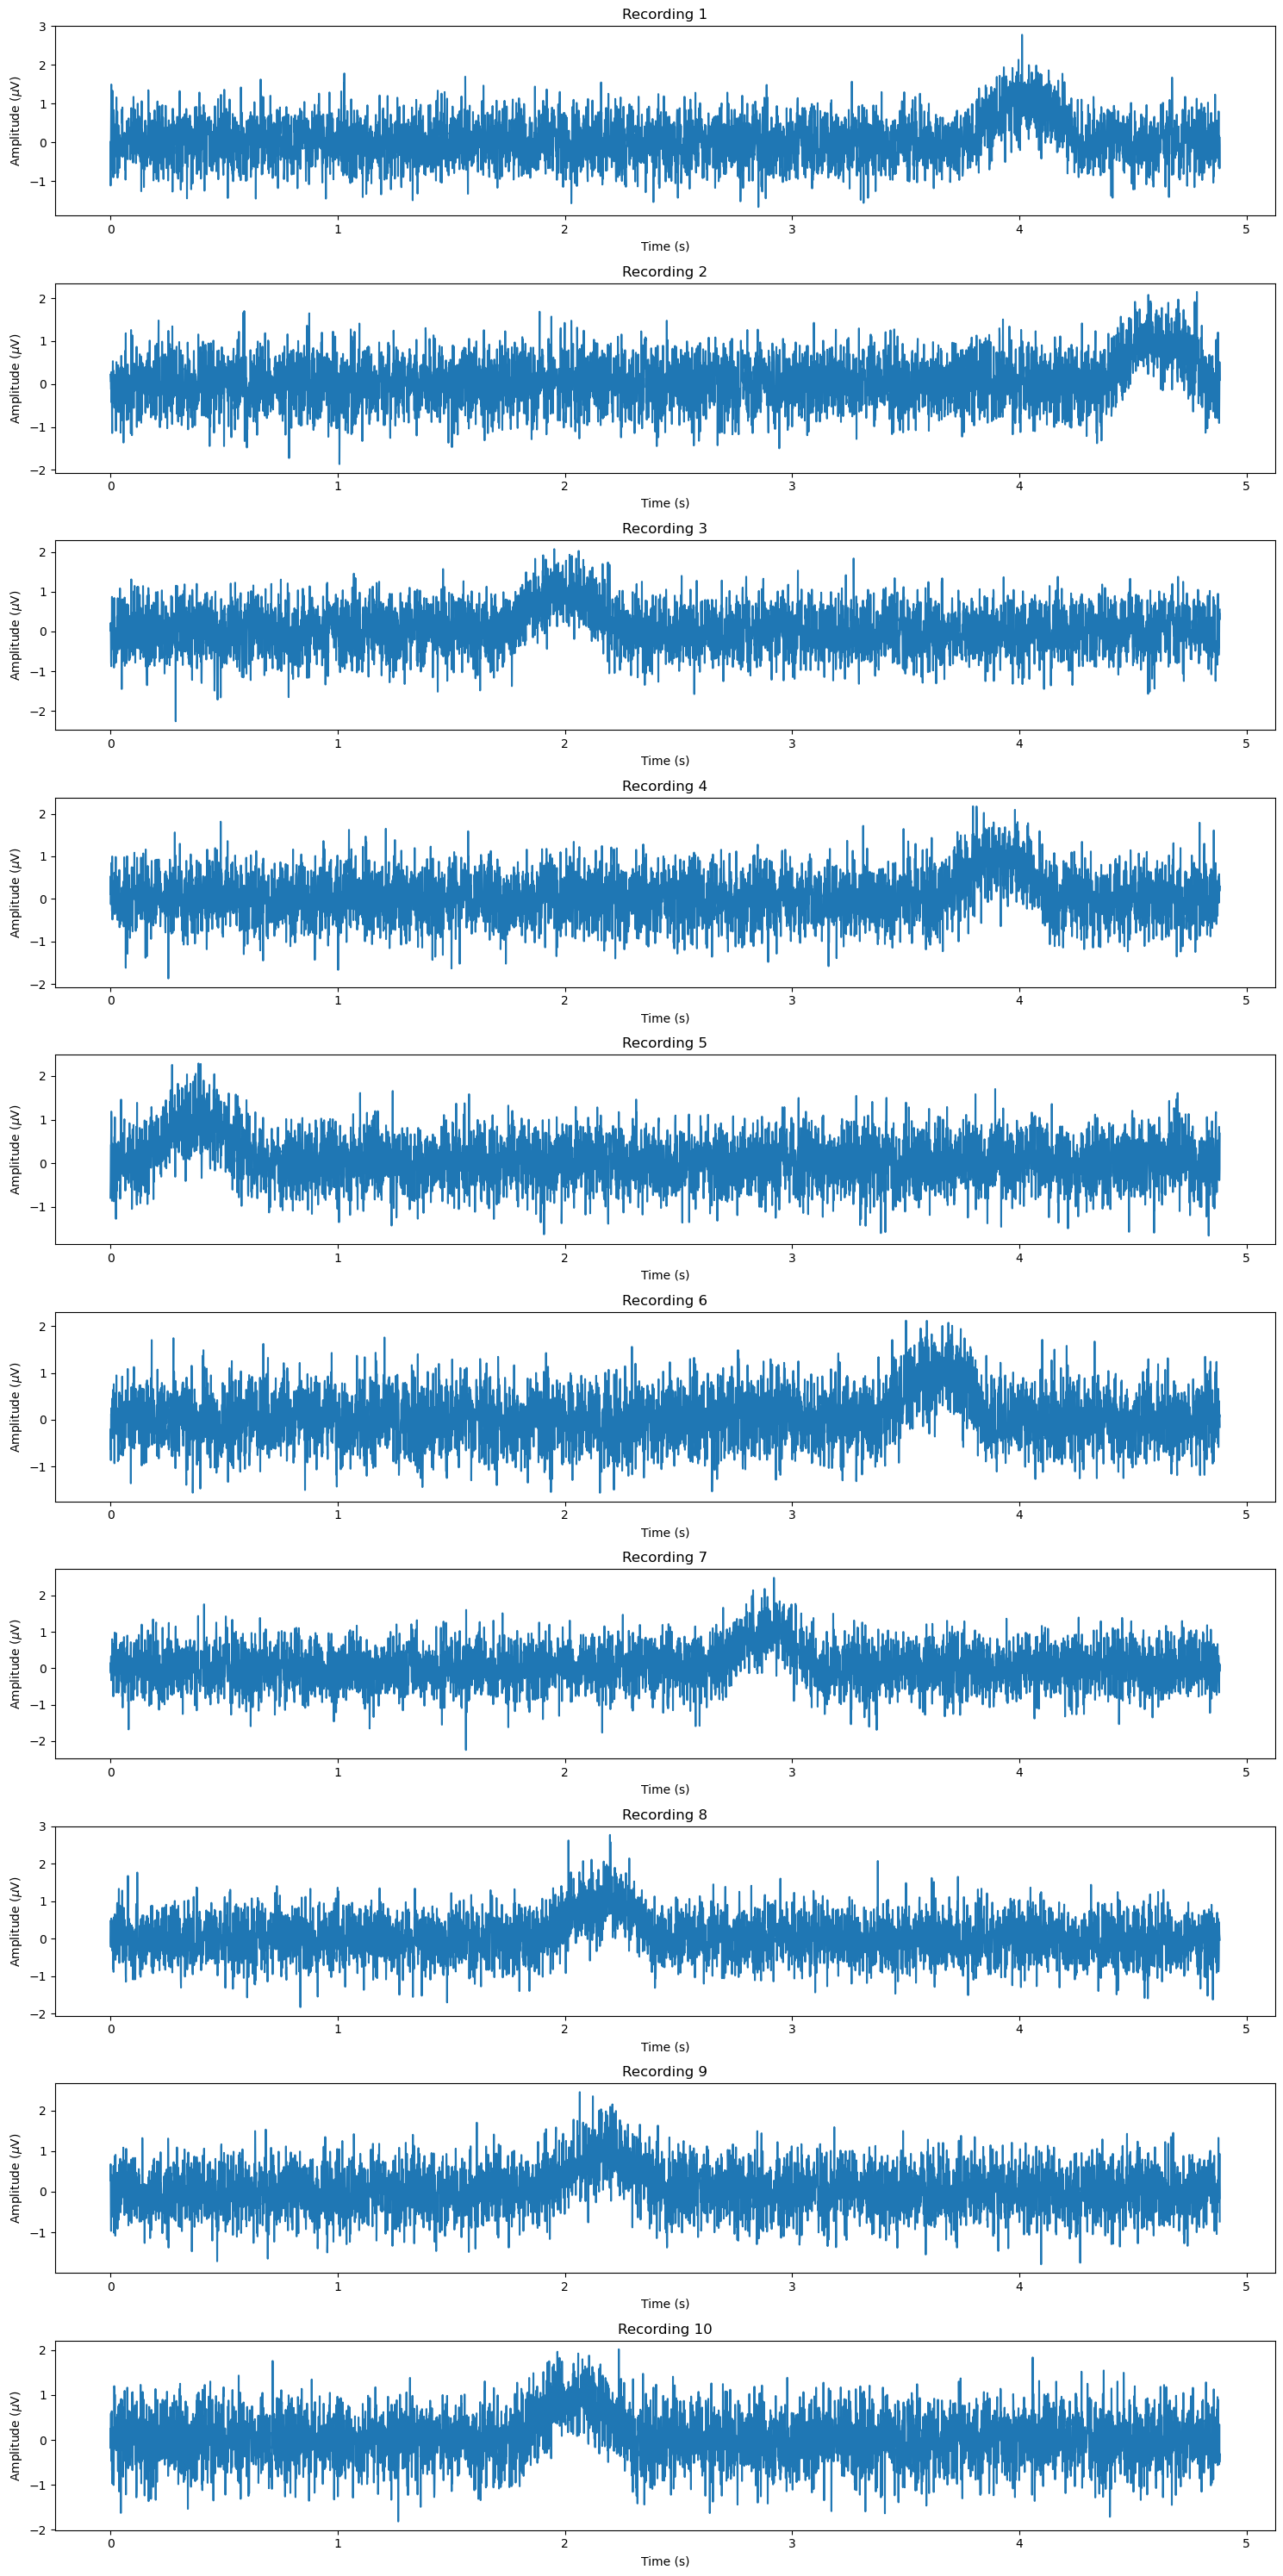

FREQUENCY DOMAIN


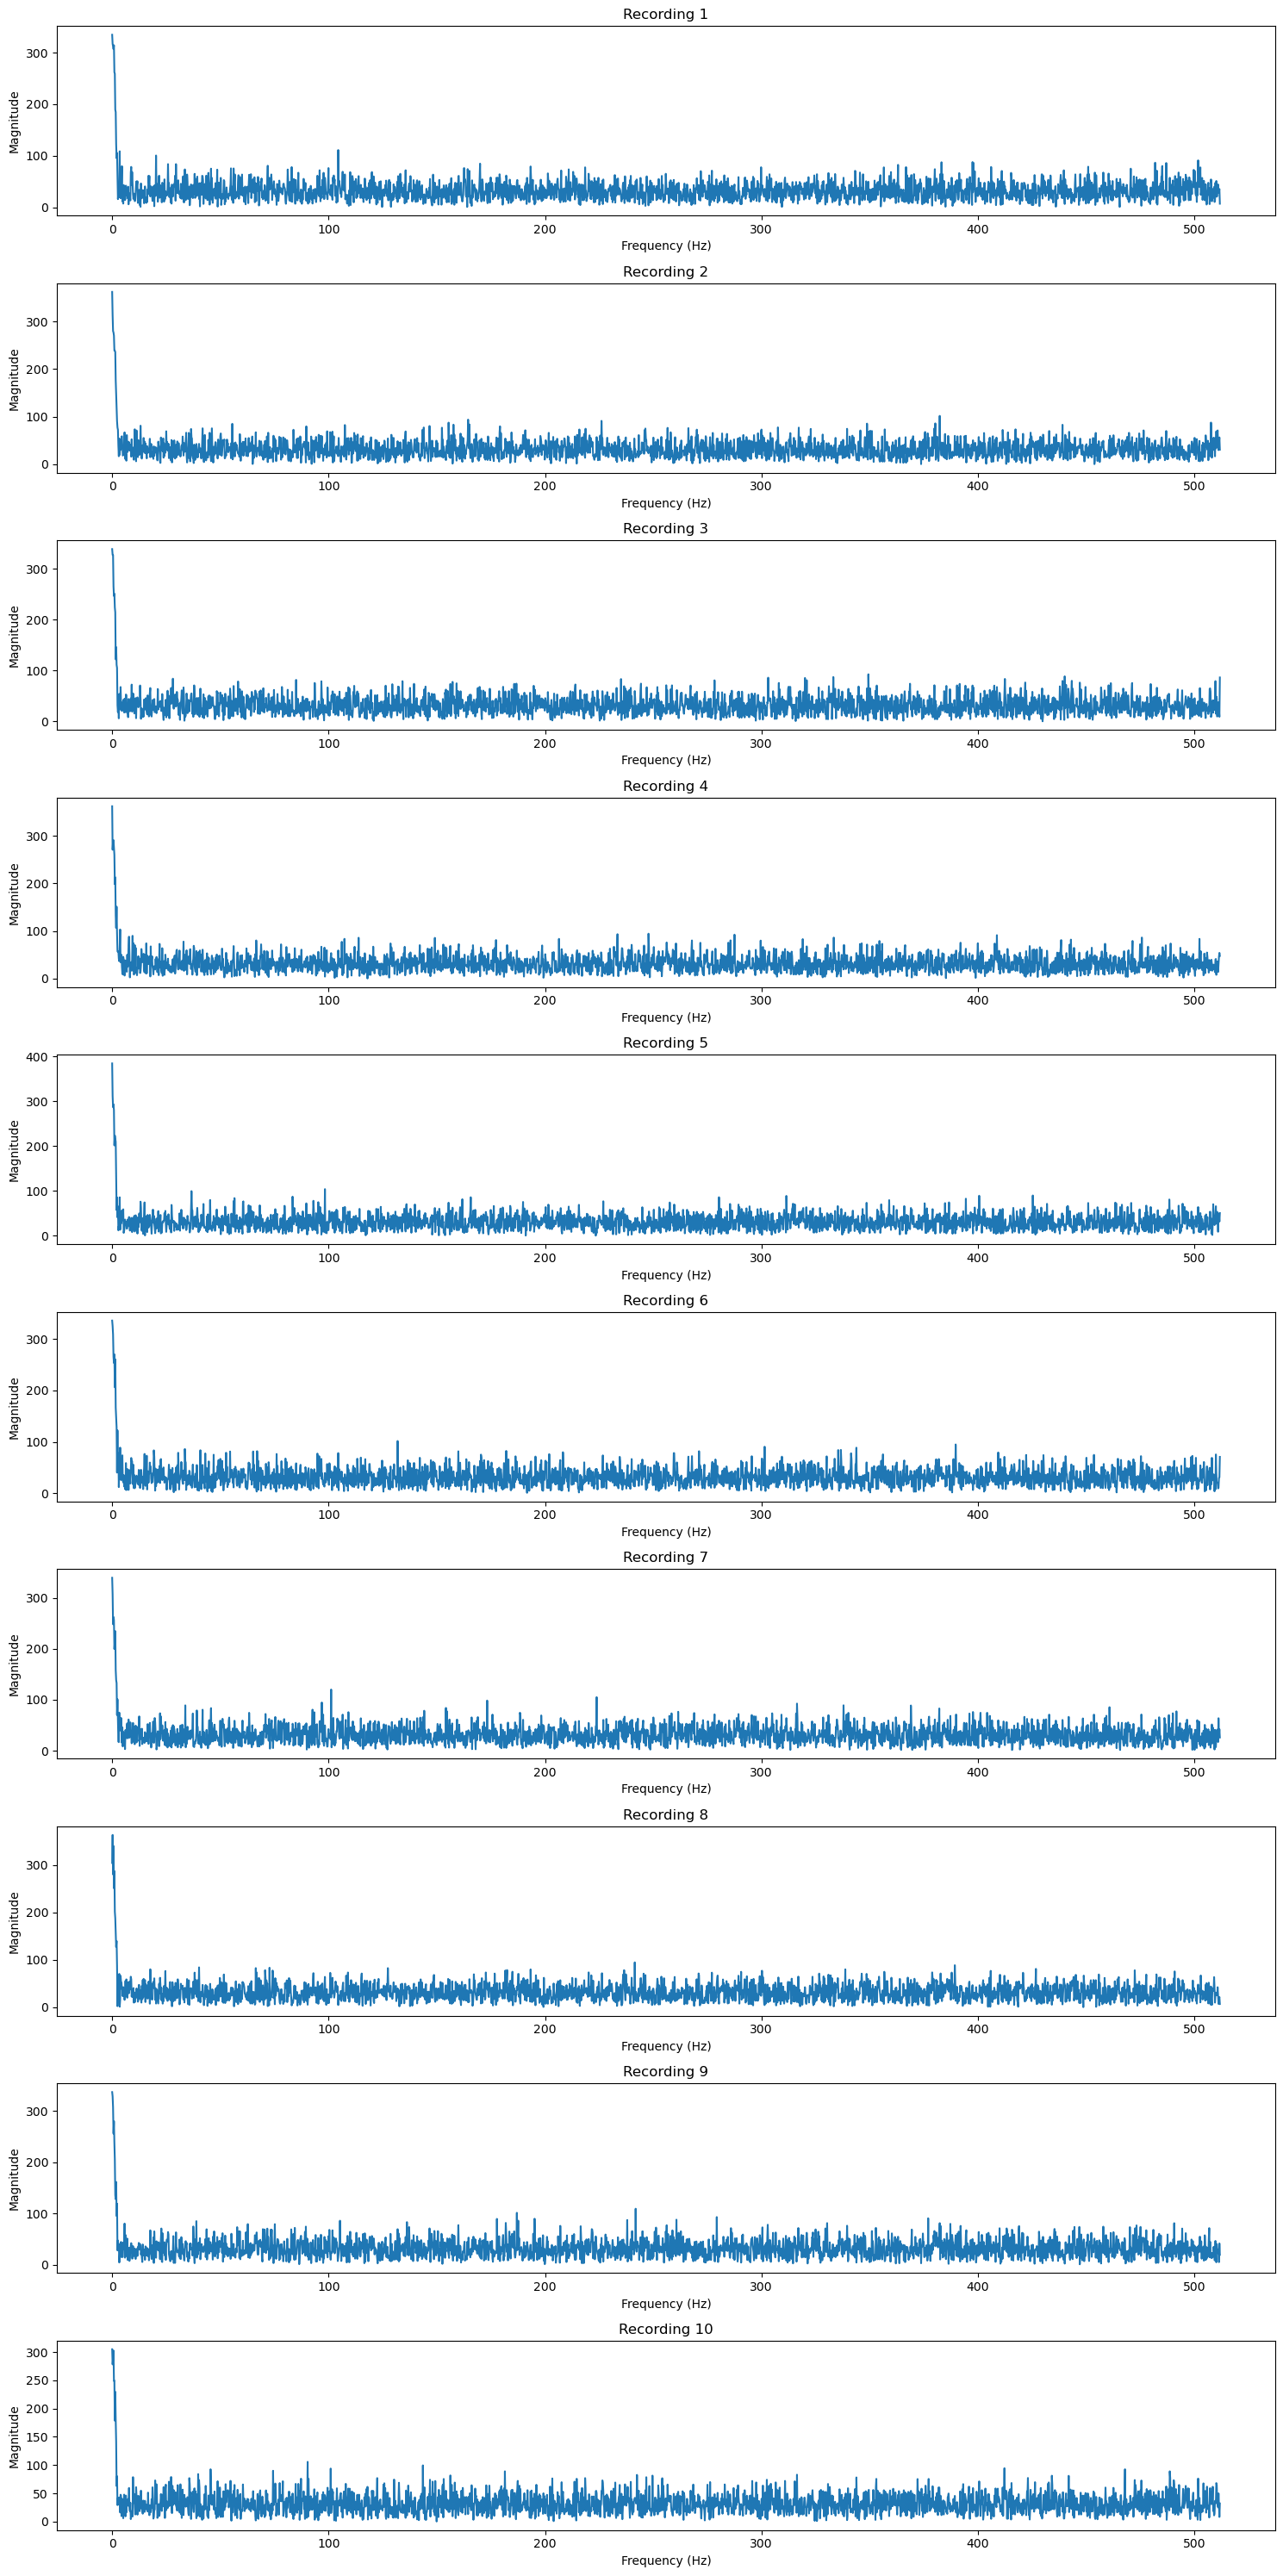

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

file_path = "/Users/elijah/Desktop/courses/bio signal analysis/BSA-2024-main/week-3-poisson-continued/eeg_signals.pkl"
sampling_rate = 1024

# Load EEG signals
with open(file_path, 'rb') as f:
    eeg_signals = pickle.load(f)

# Plots in time domain
num_signals = len(eeg_signals)
signal_length = len(eeg_signals[0])
time = np.arange(0, signal_length) / sampling_rate

plt.figure(figsize=(15, 30))
for i in range(num_signals):
    plt.subplot(num_signals, 1, i + 1)
    plt.plot(time, eeg_signals[i])
    plt.title(f"Recording {i + 1}")
    plt.xlabel("Time (s)")
    plt.ylabel(r"Amplitude ($\mu$V)")
    plt.tight_layout()
print ('TIME DOMAIN')
plt.show()

# Plots in frequency domain
freqs = fftfreq(signal_length, 1 / sampling_rate)
freqs_pos = freqs[:signal_length // 2]  # Positive freqs

plt.figure(figsize=(15, 30))
for i in range(num_signals):
    fft_magnitude = np.abs(fft(eeg_signals[i]))[:signal_length // 2]  # Single-sided magnitude spectrum
    
    plt.subplot(num_signals, 1, i + 1)
    plt.plot(freqs_pos, fft_magnitude)
    plt.title(f"Recording {i + 1}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.tight_layout()
print ('FREQUENCY DOMAIN')
plt.show()


Time domain plots suggest evoked resonses in time from 0 to 5 sec. Frequency domain plots can't provide substantial insights: frequency distrebution is generally similar across recordings.

### Creating ERP Template

Write a script to average the 10 EEG recordings, aligning them based on the known timestamps of the Event-Related Potentials (ERP). This will create an idealized template of the ERP. Plot the resulting averaged ERP and discuss its characteristics. How does averaging help in identifying the features of the ERP? Discuss any potential issues that might arise from this method.


Event at time 4.458891778355671 skipped.
Event at time 0.1370274054810962 skipped.


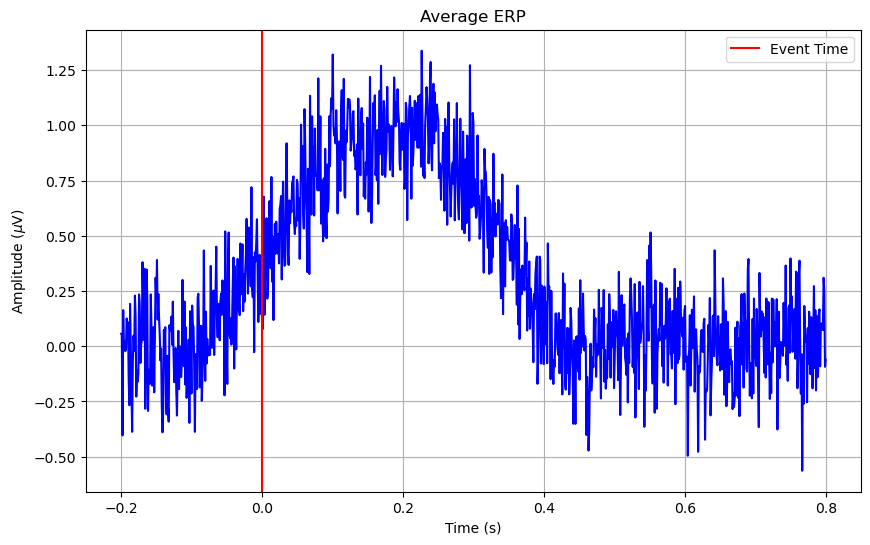

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load EEG data
file_path_data = "/Users/elijah/Desktop/courses/bio signal analysis/BSA-2024-main/week-3-poisson-continued/eeg_signals.pkl"
with open(file_path_data, 'rb') as f:
    eeg_signals = pickle.load(f)

# Load events data
file_path_events = '/Users/elijah/Desktop/courses/bio signal analysis/BSA-2024-main/week-3-poisson-continued/erp_timestamps.txt'
with open(file_path_events, 'r') as f:
    timestamps = np.loadtxt(file_path_events)

# parameters
sampling_rate = 1024
pre_event = 0.2       
post_event = 0.8      # bounaries for ERP
n_samples_pre = int(pre_event * sampling_rate)
n_samples_post = int(post_event * sampling_rate)
epoch_length = n_samples_pre + n_samples_post

num_recordings = 10
signal_length = len(eeg_signals[0])

aligned_epochs = []
for recording, t in zip(eeg_signals, timestamps):
    event_index = int(t * sampling_rate)  # Convert time to index
    start = event_index - n_samples_pre
    end = event_index + n_samples_post
    # Skip events with bound errors
    if start >= 0 and end <= len(recording):
        aligned_epochs.append(recording[start:end])
    else:
        print("Event at time {} skipped.".format(t))
aligned_epochs = np.array(aligned_epochs)

# Average ERP
averaged_erp = np.mean(aligned_epochs, axis=0)

# Plot averaged ERP
time_axis = np.linspace(-pre_event, len(averaged_erp) / sampling_rate - pre_event, len(averaged_erp))
plt.figure(figsize=(10, 6))
plt.plot(time_axis, averaged_erp, color='blue')
plt.axvline(0, color='red', linestyle='-', label='Event Time')
plt.title("Average ERP")
plt.xlabel("Time (s)")
plt.ylabel(r"Amplitude ($\mu$V)")
plt.legend()
plt.grid()
plt.show()

Averaging of ERP helps to improve SnR of EEG signal, but in order to truly benefit fron averaging set of ERP to average should be rather large. On top of that, averaging has intrinsic issues of purely statictical nature, such as sensitivity to the outlayers. 
Despite these limitations, averaging is crucial in preprcessing of EEG data for a number of advanced analysis techniques, such as bioelectrical source reconstruction.

<a id="question-8"></a>
### Matched Filter Convolution

Use the ERP template created in the previous question to perform a matched filter convolution with the new EEG recording (the one where the ERP location is unknown). Write a script that implements this convolution and identify where in the recording the ERP is most likely to occur. Provide a plot showing the convolution output and indicate the location of the ERP. Discuss how the matched filter approach helps in detecting the ERP and any limitations or challenges of this method.

**Use your convolution function from the previous steps**

Event at time 4.458891778355671 skipped.
Event at time 0.1370274054810962 skipped.


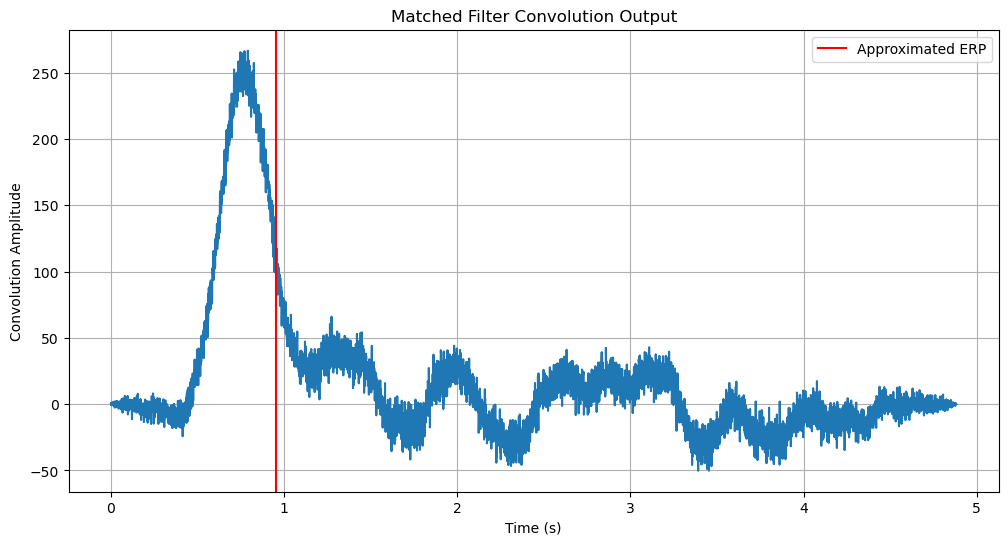

ERP is most likely to occur at time 0.9521484375 seconds


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Function for convolution
def dope_convolution_420(x, h):
    len_x = len(x)
    len_h = len(h)
    len_y = len_x + len_h - 1  # Length of the output matches 'full' mode
    
    y = [0] * len_y # Output array
    
    for n in range(len_y):
        for k in range(len_h):
            if 0 <= n - k < len_x:
                y[n] += x[n - k] * h[k]
    return y

# Load EEG data
file_path_data = "/Users/elijah/Desktop/courses/bio signal analysis/BSA-2024-main/week-3-poisson-continued/eeg_signals.pkl"
with open(file_path_data, 'rb') as f:
    eeg_signals = pickle.load(f)

# Load events data
file_path_events = '/Users/elijah/Desktop/courses/bio signal analysis/BSA-2024-main/week-3-poisson-continued/erp_timestamps.txt'
with open(file_path_events, 'r') as f:
    timestamps = np.loadtxt(file_path_events)

# Parameters
sampling_rate = 1024
pre_event = 0.2       
post_event = 0.8 # bounaries for ERP
n_samples_pre = int(pre_event * sampling_rate)
n_samples_post = int(post_event * sampling_rate)
epoch_length = n_samples_pre + n_samples_post

num_recordings = 10
signal_length = len(eeg_signals[0])

# Align epochs
aligned_epochs = []
for recording, t in zip(eeg_signals, timestamps):
    event_index = int(t * sampling_rate)  # Convert time to index
    start = event_index - n_samples_pre
    end = event_index + n_samples_post
    # Skip events with bound errors
    if start >= 0 and end <= len(recording):
        aligned_epochs.append(recording[start:end])
    else:
        print("Event at time {} skipped.".format(t))
aligned_epochs = np.array(aligned_epochs)

# Average ERP
averaged_erp = np.mean(aligned_epochs, axis=0)

# Load new EEG signal
new_eeg_filepath = '/Users/elijah/Desktop/courses/bio signal analysis/BSA-2024-main/week-3-poisson-continued/eeg_signal_to_analyze.pkl'
with open(new_eeg_filepath, 'rb') as f:
    new_eeg = pickle.load(f)

# Matched filter convolution
convolution_output = dope_convolution_420(new_eeg, averaged_erp)
convolution_output = np.array(convolution_output)

# Identify the location of the ERP
best_match_index = np.argmax(convolution_output)
best_match_time = best_match_index / sampling_rate

# Plot convolution output
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(new_eeg) / sampling_rate, len(convolution_output)), convolution_output)
plt.axvline(best_match_time, color='r', linestyle='-', label=f'Approximated ERP')
plt.title("Matched Filter Convolution Output")
plt.xlabel("Time (s)")
plt.ylabel("Convolution Amplitude")
plt.legend()
plt.grid()
plt.show()

# Print the ERP detection result
print(f"ERP is most likely to occur at time {best_match_time} seconds")


## Part 2: Poisson Spike Trains

In this question we'll create and work with a spike train. The idea is to create a set of functions that can be used for your spike train analysis pipeline. These function should be reusable. The functions or modules you should define are:

- `readPoiSpikes`
- `generatePoiSpikes`
- `calcFF`
- `calcCV`
- `alcRate`

In this week's directory in the GitRepo,  there are two spiketrain datasets named `rawSpikes1.mat` and `rawSpikes2.mat`. They both should be placed into 1 ms bins. The spike times there are in milliseconds.

**Write each function inside a jupyter code cell or python file. Upload a PDF to your gitrepo of the outputs of each of your functions for both the provided spike trains and the one you generate.

Use the following parameters to test out your code:

```python
r = 94 #spikes per second
Fs = 1e3 #Sampling frequency
totalTime = 30 #seconds
dt = 0.001 #seconds
binSize = 0.01 #seconds
```

#### Load Data

Write a function that loads a dataset in the format of the spike train files in this gitrepo and outputs it as a spike train with a set binwidth. The function has to be able to read both column and row vectors, and should be robust to empty datasets.

```python
def readPoiSpikes(fileName, Fs):

    mat_data = loadmat(fileName)
    
    if 'spikes' in mat_data: # Spkie times must be stored under 'spikes'
        data = np.ravel(mat_data['spikes'])
    else:
        print("Error: 'spikes' key not found in .mat file.")
        return np.array([])
    
    # Handle empty datasets
    if data.size == 0:
        print("Warning: Dataset is empty. Returning an empty spike train.")
        return np.array([])

    data = np.ravel(data)  # Convert to 1D array to flatten rows/cols
    max_time = np.max(data) if data.size > 0 else 0 # Get spike train length
    n_bins = int(np.ceil(max_time / Fs)) + 1  # Determine number of bins based on binwidth Fs
    spikeTrain = np.zeros(n_bins, dtype=int)     # Generate zero spike train array
    bin_indices = (data / Fs).astype(int) # Get bin indices from times and write to array
    
    for idx in bin_indices:
        if 0 <= idx < n_bins:  # Ensure valid bin index
            spikeTrain[idx] = 1   
            
    return spikeTrain
```

In [1]:
import numpy as np
from scipy.io import loadmat

def readPoiSpikes(fileName, Fs):

    mat_data = loadmat(fileName)
    
    if 'spikes' in mat_data: # Spkie times must be stored under 'spikes'
        data = np.ravel(mat_data['spikes'])
    else:
        print("Error: 'spikes' key not found in .mat file.")
        return np.array([])
    
    # Handle empty datasets
    if data.size == 0:
        print("Warning: Dataset is empty. Returning an empty spike train.")
        return np.array([])

    data = np.ravel(data)  # Convert to 1D array to flatten rows/cols
    max_time = np.max(data) if data.size > 0 else 0 # Get spike train length
    n_bins = int(np.ceil(max_time / Fs)) + 1  # Determine number of bins based on binwidth Fs
    spikeTrain = np.zeros(n_bins, dtype=int)     # Generate zero spike train array
    bin_indices = (data / Fs).astype(int) # Get bin indices from times and write to array
    
    for idx in bin_indices:
        if 0 <= idx < n_bins:  # Ensure valid bin index
            spikeTrain[idx] = 1
    
    return spikeTrain

In [3]:
Fs = 1e3
fileName_1 = '/Users/elijah/Desktop/courses/bio signal analysis/BSA-2024-main/week-3-poisson-continued/rawSpikes1.mat'
fileName_2 = '/Users/elijah/Desktop/courses/bio signal analysis/BSA-2024-main/week-3-poisson-continued/rawSpikes2.mat'

spikeTrain_1 = readPoiSpikes(fileName_1, Fs)
spikeTrain_2 = readPoiSpikes(fileName_2, Fs)

#### Generate Spike Trains

Write a function that generates a spike train, according to the Poisson process model and the explanation that was given in the exercise, under the "Poisson Generator" section. This function should run only if we didn't load a spike train earlier (don't just comment out the previous function). Here we assume $r(t)=r$ and
$P(\text{spike occurred}) = r\Delta t$ for short $\Delta t$. That means that we're considering a homogeneous process in this case. Make sure all operations are done in a vectorized manner, no loops!

```python
def generatePoiSpikes(r, dt, totalSize):
    
    spike_prob = r * dt # Compute spike probabilities for each bin
    
    # Generate random numbers and spikes
    random_vals = np.random.rand(totalSize)
    spikeTrain = (random_vals < spike_prob).astype(int)
    
    return spikeTrain
```

In [7]:
import numpy as np

def generatePoiSpikes(r, dt, totalSize):
    
    spike_prob = r * dt # Compute spike probabilities for each bin
    
    # Generate random numbers and spikes
    random_vals = np.random.rand(totalSize)
    spikeTrain = (random_vals < spike_prob).astype(float)
    
    return spikeTrain

In [14]:
r = 94 #spikes per second
dt = 0.001 #seconds
totalTime = 30 #seconds

totalSize = totalTime * r

spikeTrain_3 = generatePoiSpikes(r, dt, totalSize)

#### Fano Factor and Coefficient of Variation

After we have a spike train at hand, we want to check whether the spikes are indeed Poisson-distributed. The two ways to check it were discussed in class: the Fano Factor and Coefficient of Variation. Write two functions that check these parameters for the spike trains.

Calculate the CV and FF of the two given spike trains and the one you generated. Consider carefully how to calculate the FF of a **single** spike train.

```python
import numpy as np

def calcCV(spikeTrain):
    
    ISIs = np.diff(spikeTrain) # Calculate ISIs
    
    if len(ISIs) == 0:
        return np.nan  # Cannot calculate CV for <2 spikes
    
    mean_ISI = np.mean(ISIs)
    std_ISI = np.std(ISIs)
    CV = std_ISI / mean_ISI
    
    return CV


def calcFF(spikeTrain, binSize = 0.01):

    total_time = spikeTrain[-1]     # Determine duration of spike train
    bins = np.arange(0, total_time + binSize, binSize) # Determine bins
    
    spike_counts, _ = np.histogram(spikeTrain, bins) # Count spikes in each bin
    
    mean_count = np.mean(spike_counts)
    var_count = np.var(spike_counts)
    
    if mean_count == 0:
        return np.nan  # Avoid division by zero
    
    FF = var_count / mean_count
    
    return FF
```

In [18]:
import numpy as np

def calcCV(spikeTrain):
    
    ISIs = np.diff(spikeTrain) # Calculate ISIs
    
    if len(ISIs) == 0:
        return np.nan  # Cannot calculate CV for <2 spikes
    
    mean_ISI = np.mean(ISIs)
    std_ISI = np.std(ISIs)
    CV = std_ISI / mean_ISI
    
    return CV


def calcFF(spikeTrain, binSize = 0.01):

    total_time = spikeTrain[-1]     # Determine duration of spike train
    bins = np.arange(0, total_time + binSize, binSize) # Determine bins
    
    spike_counts, _ = np.histogram(spikeTrain, bins) # Count spikes in each bin
    
    mean_count = np.mean(spike_counts)
    var_count = np.var(spike_counts)
    
    if mean_count == 0:
        return np.nan  # Avoid division by zero
    
    FF = var_count / mean_count
    
    return FF

In [22]:
CV_1 = calcCV(spikeTrain_1)
CV_2 = calcCV(spikeTrain_2)
CV_3 = calcCV(spikeTrain_3)
FF_1 = calcFF(spikeTrain_1)
FF_2 = calcFF(spikeTrain_2)
FF_3 = calcFF(spikeTrain_3)

print(f'For spike spikeTrain_1 CV={CV_1}, FF={FF_1}')
print(f'For spike spikeTrain_2 CV={CV_2}, FF={FF_2}')
print(f'For spike spikeTrain_3 CV={CV_3}, FF={FF_3}')

For spike spikeTrain_1 CV=-7.937253933193772, FF=nan
For spike spikeTrain_2 CV=-3.162277660168379, FF=nan
For spike spikeTrain_3 CV=-1068.5008189046935, FF=nan


#### Rate of fire

Lastly we'll check the rate of fire of our neurons. The function should receive a spike train and length of the window in which it should calculate the rate. Length = 0 means that it should just return the average rate of fire of the whole train. A different window requires you to calculate the firing rate in that window, and plot the results over time - $r(t)$. Make sure the function is robust for all types of inputs. Calculate the rate of fire for the two given spike trains and the one you generated

```Python
def calcRate(spikeTrain, window, dt):

    spikeTrain = np.array(spikeTrain)
    totalTime = len(spikeTrain) * dt

    if window == 0:     # Average firing rate for the whole train if length = 0
        totalSpikes = np.sum(spikeTrain)
        rateOfFire = totalSpikes / totalTime  
        print(f"Average firing rate: {rateOfFire:.2f} Hz")
        return rateOfFire

    else: # Firing rate over time with sliding window
        windowSize = int(window / dt)  # Convert window size to number of samples
        rates = []
        time = []

        for i in range(0, len(spikeTrain) - windowSize + 1):
            windowSpikes = np.sum(spikeTrain[i:i + windowSize])
            rate = windowSpikes / (window * dt) 
            rates.append(rate)
            time.append(i * dt)  # Time corresponding to the start of the window

        rates = np.array(rates)
        time = np.array(time)

        # Plot the firing rate
        plt.figure(figsize=(10, 5))
        plt.plot(time, rates)
        plt.xlabel("Time (s)")
        plt.ylabel("Firing Rate (Hz)")
        plt.title("Firing Rate over Time")
        plt.grid()
        plt.show()
        
        return rates    
```

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def calcRate(spikeTrain, window, dt):

    spikeTrain = np.array(spikeTrain)
    totalTime = len(spikeTrain) * dt

    if window == 0:     # Average firing rate for the whole train if length = 0
        totalSpikes = np.sum(spikeTrain)
        rateOfFire = totalSpikes / totalTime  # Firing rate in Hz
        print(f"Average firing rate: {rateOfFire:.2f} Hz")
        return rateOfFire

    else: # Firing rate over time with sliding window
        windowSize = int(window / dt)  # Convert window size to number of samples
        rates = []
        time = []

        for i in range(0, len(spikeTrain) - windowSize + 1):
            windowSpikes = np.sum(spikeTrain[i:i + windowSize])
            rate = windowSpikes / (window * dt)  # Rate in Hz
            rates.append(rate)
            time.append(i * dt)  # Time corresponding to the start of the window

        rates = np.array(rates)
        time = np.array(time)

        # Plot the firing rate over time
        plt.figure(figsize=(10, 5))
        plt.plot(time, rates)
        plt.xlabel("Time (s)")
        plt.ylabel("Firing Rate (Hz)")
        plt.title("Firing Rate over Time")
        plt.grid()
        plt.show()
        
        return rates

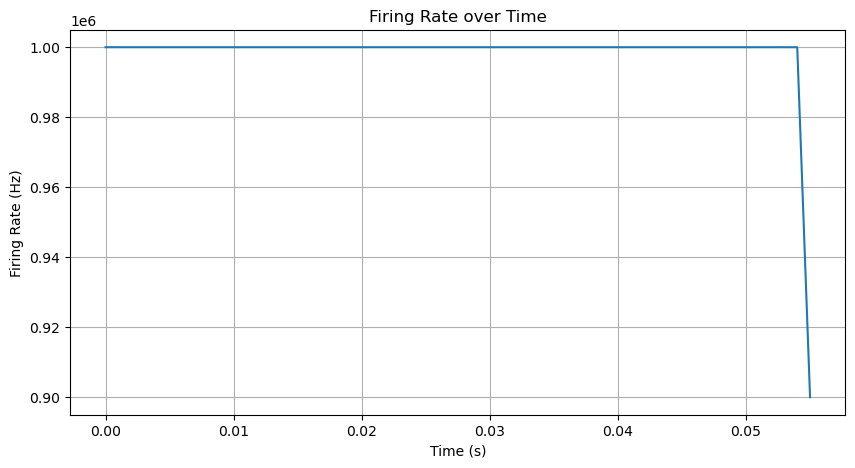

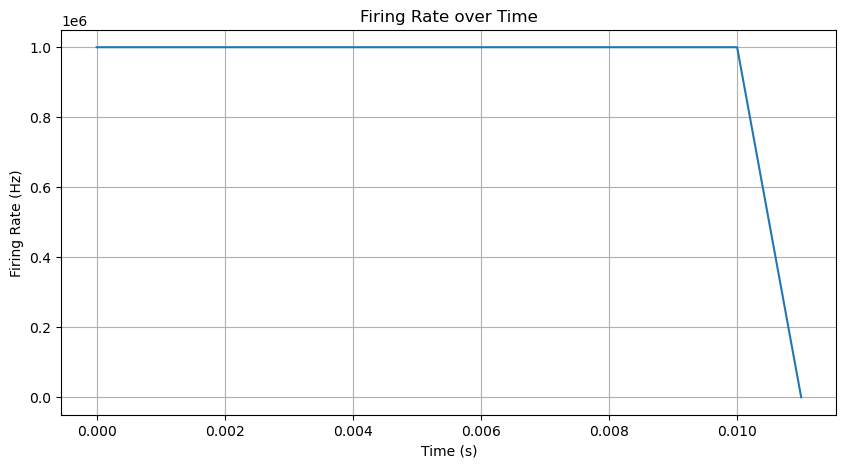

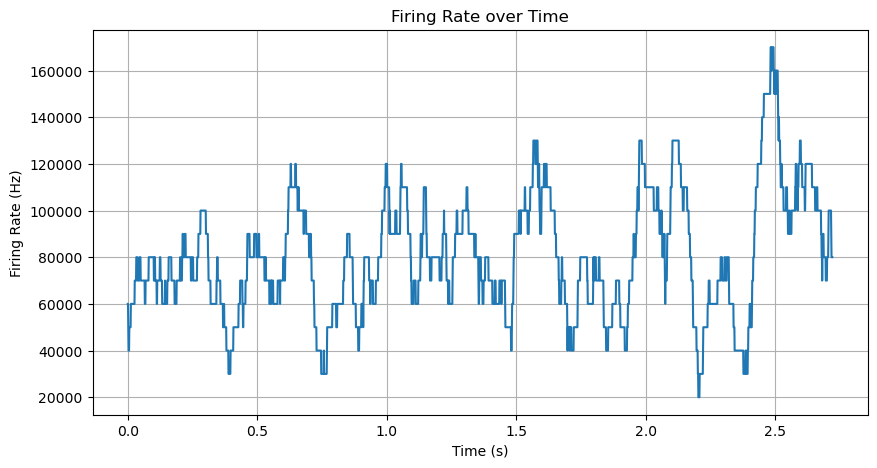

In [27]:
dt = 0.001 #seconds
r = 94 #spikes per second
totalTime = 30 #seconds

rate_1 = calcRate(spikeTrain_1, 0.01, dt)
rate_2 = calcRate(spikeTrain_2, 0.001, dt)
rate_3 = calcRate(spikeTrain_3, 0.1, dt)